In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import PyRandomUtils as pru
from pdb import pm
import utils.CardUtils as cu
import numpy as np
import matplotlib.pyplot as plt
import utils.sobol_seq as ss

In [3]:
batch_size = 36 #number of deals in a batch
num_batches = 100

In [4]:
DECK = np.array(range(1,53), dtype=np.int8)
ts = cu.theoretical_probabilities
def shuffled(gen):
    tmp = np.array(DECK)
    pru.shuffle(gen, tmp)
    return tmp

In [5]:
class SobolGen(pru.PRNG):
    def __init__(self, seed):
        self.seed = seed
        
    def rand(self):
        r, self.seed = ss.i4_sobol(1, self.seed)
        return r

In [6]:
#bad prng
bad = pru.LCG(mod=2**10, a=1140671485, c=128201163, seed=1)

#deterministic gen
sobol  = SobolGen(1)

#good prng
good = pru.PyRandGen(1)

In [7]:
# mydeck = shuffled(sobol)
# mydeck

In [8]:
def make_ts(gen, batches=num_batches, batch_size=batch_size):
    ts = [sum((cu.get_features(shuffled(gen)) for i in range(batch_size))) / batch_size
           for j in range(num_batches)]
    return np.array(ts).T

In [9]:
%%time
ts_bad = make_ts(bad)
# ts_bad

CPU times: user 441 ms, sys: 7.8 ms, total: 449 ms
Wall time: 452 ms


In [10]:
np.set_printoptions(threshold=np.nan)
# ts_bad

In [11]:
%%time
# ts_good = make_ts(good)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 15 µs


In [12]:
%%time
# ts_sobol = make_ts(sobol)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


In [13]:
def make_graphs(ts):
    dim = ts.shape[0]
    fig, ax = plt.subplots(dim,1, figsize = (15, 100))
    tp = cu.theoretical_probabilities


    for i in range(dim):
        plt.subplot(dim,1,i+1)
        plt.title(cu.feature_string[i],fontsize=16)
        plt.plot(ts[i] - tp[i])

def print_means(ts):
    means = np.apply_along_axis(np.mean, 1, ts)
    tp = cu.theoretical_probabilities
    print("{:22}{:^22}{:^22}{:^22}".format("Feature", "p", "p_hat", "p-p_hat"))
    for i in range(len(cu.feature_string)):
        print("{:20} {: 20.18f} {: 20.18f} {: 20.18f}".format(cu.feature_string[i], 
                                           tp[i], 
                                           means[i], 
                                           tp[i]-means[i]))

In [14]:
# print_means(ts_bad)

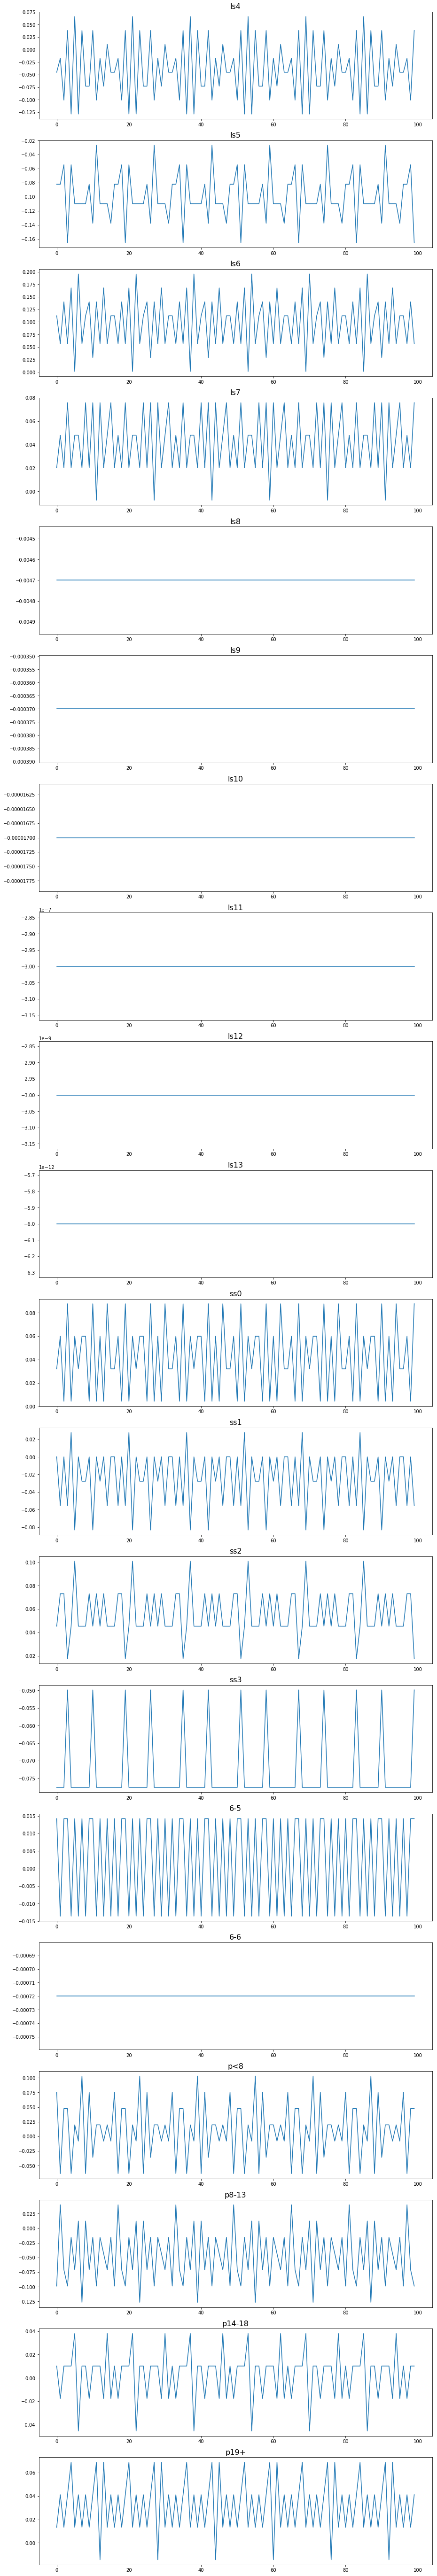

In [15]:
# print(ts_sobol.shape)
make_graphs(ts_bad)